In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

C:\Users\etmu9498\AppData\Local\Temp/ipykernel_23344/1437374251.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( lon, - crl_data.H, temp, cmap = color_map )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_23344/1437374251.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( lon, - crl_data.H, temp_anomaly, cmap = "bwr" )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_23344/1437374251.py:81: RuntimeWarning: Mean of empty sli

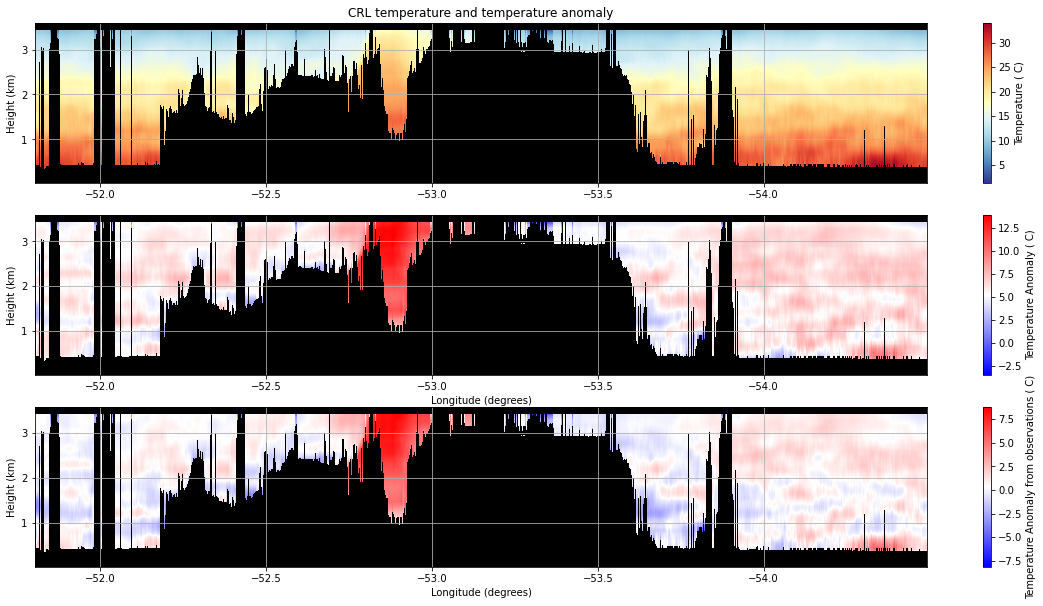

In [32]:
crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"
file_name = "P3_20210927H1_213003-253558.cdf"
title = 'CRL temperature and temperature anomaly'

os.chdir( crl_path)
crl_data = xr.open_dataset( file_name)

index1 = 4700  
index2 = 6500  


# temperature 
fig = plt.figure( figsize=(20, 10))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.subplot(311)
lon = crl_data.Lon[index1:index2]
temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

plt.title( title)

plt.pcolormesh( lon, - crl_data.H, temp, cmap = color_map ) 
plt.ylabel( 'Height (km)')
# plt.xlabel( 'Longitude (degrees)')

plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')

plt.colorbar(label="Temperature ( C)")



# temperature anomaly

plt.subplot(312)

# figure out observational and average pressures
scale_ht = 7.5 # km, just an estimate
pressure = 1015.3 * np.exp( crl_data.H / scale_ht) # hPa

obs_pressure = [ 1015.3, 1000, 925, 850, 700, 600]
obs_T = [26.9, 26.4, 21.7, 17.4, 9.1, 1.7]

T1 = np.linspace( 3.8, obs_T[4], 134)
T2 = np.linspace( obs_T[4], obs_T[3], 376-133)
T3 = np.linspace( obs_T[3], obs_T[2], 482-376)
T4 = np.linspace( obs_T[2], obs_T[1], 579-482)
T5 = np.linspace( obs_T[1], obs_T[0], 593-579)

T_expanded = np.concatenate( (T1, T2, T3, T4, T5) )

# calculate temeprature anomaly!
avg_temp = np.ones_like( temp)
for i in range( index2 - index1):
    avg_temp[:, i] = avg_temp[:, i] * T_expanded
temp_anomaly = temp - avg_temp

plt.pcolormesh( lon, - crl_data.H, temp_anomaly, cmap = "bwr" ) 
plt.colorbar(label="Temperature Anomaly ( C)")
# CS = plt.contour( lon, - crl_data.H, temp_anomaly, 5, colors='k')
# plt.clabel(CS, inline=True, fontsize=10)

plt.ylabel( 'Height (km)')
plt.xlabel( 'Longitude (degrees)')

plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')




# calculate temperature anomaly using a local average from our data!
plt.subplot(313)

layer_avg_temp = np.nanmean( crl_data.T.where( crl_data.T.values < 50).transpose(), axis = 1)

# calculate temeprature anomaly!
avg_temp_obs = np.ones_like( temp)
for i in range( index2 - index1):
    avg_temp_obs[:, i] = avg_temp_obs[:, i] * T_expanded_obs
temp_anomaly_obs = temp - avg_temp_obs

plt.pcolormesh( lon, - crl_data.H, temp_anomaly_obs, cmap = "bwr" ) 
plt.colorbar(label="Temperature Anomaly from observations ( C)")

plt.ylabel( 'Height (km)')
plt.xlabel( 'Longitude (degrees)')

plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
plt.grid( 'on')

ax = plt.gca()
ax.set_facecolor('k')


<xarray.DataArray 'H' ()>
array(1011.15252686)
<xarray.DataArray 'H' ()>
array(629.19805908)


594
<xarray.DataArray 'H' ()>
array(1011.1525, dtype=float32)


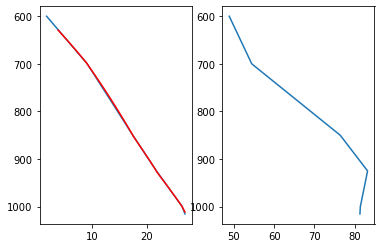

In [8]:
obs_pressure = [ 1015.3, 1000, 925, 850, 700, 600]
obs_T = [26.9, 26.4, 21.7, 17.4, 9.1, 1.7]
obs_rh = [81.3, 81.4, 83.2, 76.4, 54.4, 48.8]


print( pressure.max())
print( pressure.min())

print( "\n\n" + str( len( pressure)))
print( pressure[593])

# 0 -> 629.2
# 133 -> 699.8
# 376 -> 850
# 482 -> 925.23
# 579 -> 999.9
# 593 -> 1011.15

T1 = np.linspace( 3.8, obs_T[4], 134)
T2 = np.linspace( obs_T[4], obs_T[3], 376-133)
T3 = np.linspace( obs_T[3], obs_T[2], 482-376)
T4 = np.linspace( obs_T[2], obs_T[1], 579-482)
T5 = np.linspace( obs_T[1], obs_T[0], 593-579)

T_expanded = np.concatenate( (T1, T2, T3, T4, T5) )
# print( T_expanded)


plt.subplot(121)
plt.plot(obs_T, obs_pressure)
plt.plot( T_expanded, pressure, 'r')
plt.gca().invert_yaxis()

plt.subplot(122)
plt.plot(obs_rh, obs_pressure)
plt.gca().invert_yaxis()

In [12]:
print( np.shape(temp) )#  = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

avg_temp = np.ones_like( temp)
print( np.shape( avg_temp))

for i in range( 1800):
    avg_temp[:, i] = avg_temp[:, i] * T_expanded

print( avg_temp[0, :])
print( avg_temp[-1, :])
print( np.shape( avg_temp))

temp_anomaly = temp - avg_temp

print( len( np.linspace( 3800, 4950, 4950 - 3800)))

(594, 1800)
(594, 1800)
[3.8 3.8 3.8 ... 3.8 3.8 3.8]
[26.9 26.9 26.9 ... 26.9 26.9 26.9]
(594, 1800)
1150
594


594
(594, 7322)


C:\Users\etmu9498\AppData\Local\Temp/ipykernel_23344/2979581944.py:6: RuntimeWarning: Mean of empty slice
  layer_avg_temp = np.nanmean( crl_data.T.where( crl_data.T.values < 50).transpose(), axis = 1)


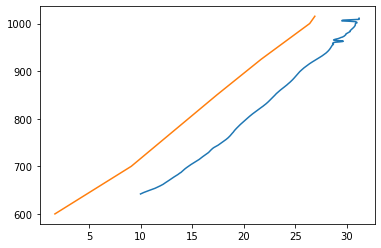

In [31]:
# find average temperature in a range of atm away from clouds + eye


# np.average( crl_data.T[3800:4950, :].where( crl_data.T[3800:4950, :].values < 50).transpose()

layer_avg_temp = np.nanmean( crl_data.T.where( crl_data.T.values < 50).transpose(), axis = 1)

print( len( layer_avg_temp) )

print( np.shape( crl_data.T.where( crl_data.T.values < 50).transpose()))
    
plt.plot( layer_avg_temp, pressure)
plt.plot(obs_T, obs_pressure)